In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [23]:
df_imdb = pd.read_csv(r"C:\UDAYANA\TEKNOLOGI INFORMASI\SEMESTER 8\Data Analytics & Visualization\tubes_scatter V2\IMDB_Scrape.csv")

In [24]:
df_imdb.head()

,Unnamed: 0,movie,year,rating,genre,runtime_min,imdb,metascore,votes,n_imdb
0,0,65,2023,PG-13,"['Action', ' Adventure', ' Drama']",93,5.5,40,31295,55
1,1,Avatar: The Way of Water,2022,PG-13,"['Action', ' Adventure', ' Fantasy']",192,7.7,67,357260,77
2,2,Super Mario Bros.,1993,PG,"['Adventure', ' Comedy', ' Family']",104,4.1,35,58495,41
3,3,Everything Everywhere All at Once,2022,R,"['Action', ' Adventure', ' Comedy']",139,7.9,81,428222,79
4,4,Ant-Man and the Wasp: Quantumania,2023,PG-13,"['Action', ' Adventure', ' Comedy']",124,6.4,48,101578,64


In [28]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 592
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   589 non-null    int64  
 1   movie        589 non-null    object 
 2   year         589 non-null    int64  
 3   rating       589 non-null    object 
 4   genre        589 non-null    object 
 5   runtime_min  589 non-null    int64  
 6   imdb         589 non-null    float64
 7   metascore    589 non-null    int64  
 8   votes        589 non-null    int64  
 9   n_imdb       589 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 50.6+ KB


In [26]:
df_imdb[df_imdb.isnull().any(axis=1)]

,Unnamed: 0,movie,year,rating,genre,runtime_min,imdb,metascore,votes,n_imdb
150,150,Linoleum,2022,NaN,"['Comedy', ' Drama', ' Sci-Fi']",101,6.6,80,733,66
439,439,Project Wolf Hunting,2022,NaN,"['Action', ' Crime', ' Horror']",122,6.1,53,3531,61
476,476,The Wandering Earth II,2023,NaN,"['Action', ' Adventure', ' Drama']",173,7.6,56,8324,76
547,547,"Blind Willow, Sleeping Woman",2022,NaN,"['Animation', ' Drama', ' Sci-Fi']",108,7.1,72,393,71


In [29]:
del_row = []
for index, row in df_imdb.iterrows():
    if row.isnull().any():
        del_row.append(index)

df_imdb = df_imdb.drop(del_row)

In [30]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 592
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   589 non-null    int64  
 1   movie        589 non-null    object 
 2   year         589 non-null    int64  
 3   rating       589 non-null    object 
 4   genre        589 non-null    object 
 5   runtime_min  589 non-null    int64  
 6   imdb         589 non-null    float64
 7   metascore    589 non-null    int64  
 8   votes        589 non-null    int64  
 9   n_imdb       589 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 50.6+ KB


In [8]:
# for feature in df_imdb.columns:
#     if (
#         feature.endswith("year")
#         or feature.endswith("runtime_min")
#         or feature.endswith("metascore")
#         or feature.endswith("votes")
#         or feature.endswith("n_imdb")
#         or feature.endswith("imdb")
#     ):
#         df_imdb[feature] = df_imdb[feature].astype("object")

In [31]:
#membuat dataframe baru untuk dilakukan proses modelling
df_review_analysis = df_imdb[['n_imdb','metascore','votes']].copy()

In [32]:
#encode column genre
onehot = OneHotEncoder()
onehot.fit(df_review_analysis.select_dtypes(include="object"))
X_onehot = pd.DataFrame(onehot.transform(df_review_analysis.select_dtypes(include="object")).toarray(),columns=onehot.get_feature_names_out())

X_processed = pd.concat([df_review_analysis.select_dtypes(include="object"),X_onehot],axis=1)

In [33]:
#standarisasi nilai pada df_review_analysis
scaler = StandardScaler()
scaler.fit(df_review_analysis)
X_scaled = pd.DataFrame(scaler.transform(df_review_analysis),columns=df_review_analysis.columns)
X_scaled.head()

,n_imdb,metascore,votes
0,-1.083143,-1.063466,-0.849495
1,1.151432,0.599167,0.249248
2,-2.505145,-1.371361,-0.757811
3,1.354575,1.461273,0.488442
4,-0.168999,-0.570834,-0.612590


In [34]:
# sum of squared distances
ssd = []

# may take a longer time to run
for k in range(1, 20):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    model.fit(X_scaled)

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Clustering with n_clusters=2
Clustering with n_clusters=3
Clustering with n_clusters=4
Clustering with n_clusters=5
Clustering with n_clusters=6
Clustering with n_clusters=7
Clustering with n_clusters=8
Clustering with n_clusters=9
Clustering with n_clusters=10
Clustering with n_clusters=11
Clustering with n_clusters=12
Clustering with n_clusters=13
Clustering with n_clusters=14
Clustering with n_clusters=15
Clustering with n_clusters=16
Clustering with n_clusters=17
Clustering with n_clusters=18
Clustering with n_clusters=19


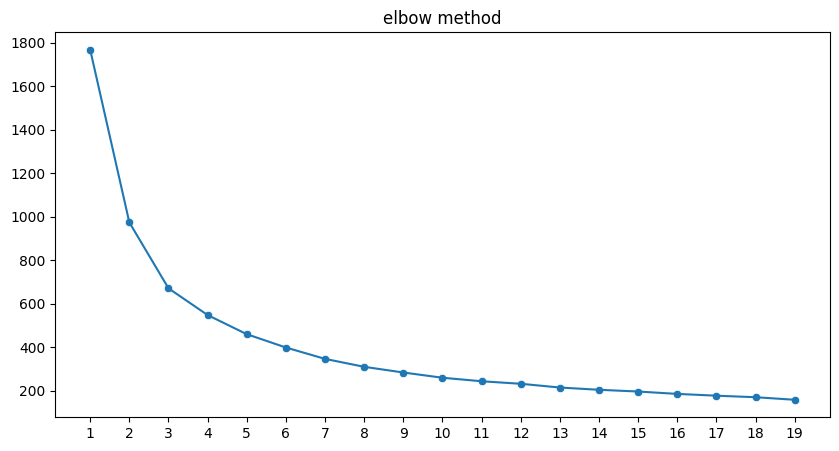

In [35]:
plt.figure(figsize=(10, 5))
plt.title("elbow method")
sns.lineplot(x=range(1, 20), y=ssd)
sns.scatterplot(x=range(1, 20), y=ssd)
plt.xticks(range(1, 20))
plt.show()

In [40]:
K = 3
kmeans_5 = KMeans(n_clusters=K, random_state=11)
kmeans_5.fit(X_scaled)

KMeans(n_clusters=3, random_state=11)

In [41]:
df_review_analysis = df_review_analysis.assign(
    review_quality = kmeans_5.predict(X_scaled)
)
display(df_review_analysis)

,n_imdb,metascore,votes,review_quality
0,55,40,31295,0
1,77,67,357260,2
2,41,35,58495,0
3,79,81,428222,1
4,64,48,101578,0
...,...,...,...,...
588,63,59,22076,2
589,71,44,116029,2
590,51,30,40003,0
591,42,53,46143,0


In [42]:
silhouette_scores = []

# may take a longer time to run
for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    model.fit(X_scaled)

    print("Calculating silhouette coefficient..")
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))

Clustering with n_clusters=2
Calculating silhouette coefficient..
Clustering with n_clusters=3
Calculating silhouette coefficient..
Clustering with n_clusters=4
Calculating silhouette coefficient..
Clustering with n_clusters=5
Calculating silhouette coefficient..
Clustering with n_clusters=6
Calculating silhouette coefficient..
Clustering with n_clusters=7
Calculating silhouette coefficient..
Clustering with n_clusters=8
Calculating silhouette coefficient..
Clustering with n_clusters=9
Calculating silhouette coefficient..
Clustering with n_clusters=10
Calculating silhouette coefficient..
Clustering with n_clusters=11
Calculating silhouette coefficient..
Clustering with n_clusters=12
Calculating silhouette coefficient..
Clustering with n_clusters=13
Calculating silhouette coefficient..
Clustering with n_clusters=14
Calculating silhouette coefficient..
Clustering with n_clusters=15
Calculating silhouette coefficient..
Clustering with n_clusters=16
Calculating silhouette coefficient..
Clu

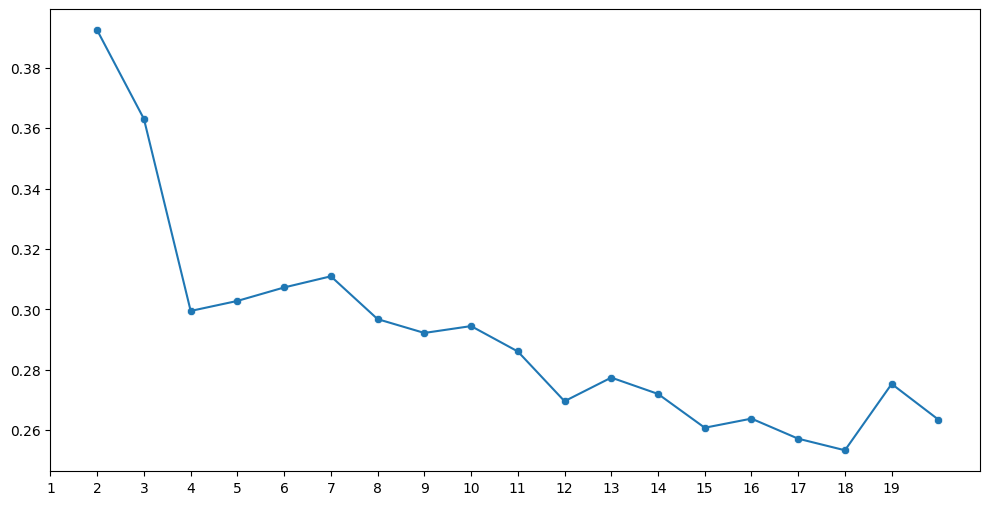

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 21), y=silhouette_scores)
sns.scatterplot(x=range(2, 21), y=silhouette_scores)
plt.xticks(range(1, 20))
plt.show()

In [43]:
df_final = df_review_analysis

df_final = pd.DataFrame().assign(
    id = df_imdb['Unnamed: 0'],
    movie = df_imdb['movie'],
    year = df_imdb['year'],
    rating = df_imdb['rating'],
    genre = df_imdb['genre'],
    runtime = df_imdb['runtime_min'],
    imdb = df_review_analysis['n_imdb'],
    metascore = df_review_analysis['metascore'],
    votes = df_review_analysis['votes'],
    review_quality = df_review_analysis['review_quality']
)

df_final.head()

,id,movie,year,rating,genre,runtime,imdb,metascore,votes,review_quality
0,0,65,2023,PG-13,"['Action', ' Adventure', ' Drama']",93,55,40,31295,0
1,1,Avatar: The Way of Water,2022,PG-13,"['Action', ' Adventure', ' Fantasy']",192,77,67,357260,2
2,2,Super Mario Bros.,1993,PG,"['Adventure', ' Comedy', ' Family']",104,41,35,58495,0
3,3,Everything Everywhere All at Once,2022,R,"['Action', ' Adventure', ' Comedy']",139,79,81,428222,1
4,4,Ant-Man and the Wasp: Quantumania,2023,PG-13,"['Action', ' Adventure', ' Comedy']",124,64,48,101578,0


In [20]:
df_final.to_csv("output_IMDB.csv")